In [366]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [367]:
sales = pd.read_csv('data/SALE_ALL.csv')
purchases = pd.read_csv('data/PURCHASE_ALL.csv')
item_map = pd.read_csv('data/ProductIdMapp.csv')
selected_items = pd.read_csv('data/selected_items.csv')

In [368]:
sales.head()

,OrderDate,ProdId,Quantity
0,2019-08-08,2701,1.0
1,2019-08-08,4284,1.0
2,2019-08-08,2154,1.0
3,2019-08-08,275,1.0
4,2019-08-08,3616,1.0


In [369]:
purchases.head()

,OrderDate,ProdId,Quantity
0,2019-08-08,113,1.0
1,2019-08-08,130,2.0
2,2019-08-08,131,30.0
3,2019-08-08,145,1.0
4,2019-08-08,146,5.0


In [370]:
item_map.head()

,ProdId,ItemName
0,100,MULTIVITAMINES GLOBAL 12 VIT+ 7 OLIGO ELEMENTS...
1,102,804 AIDE MINCEUR TRIPLE ACTION CP B/30 3CHENE
2,103,804 BRULE GRAISSE SOL BUV STABILISATEUR FL/500ML
3,104,804 PACK MINCEUR
4,105,804 SOUPE B/300G LEGUMES


In [371]:
selected_items.head()

,ProdId,SaledQte,PurchasedQte,diff
0,100,1.026315,1.538461,0.512146
1,102,1.000000,1.000000,0.000000
2,106,1.000000,1.250000,0.250000
3,113,1.108247,1.956521,0.848274
4,115,1.000000,1.000000,0.000000


**Traitement des valeures dupliquée des salesS**

In [372]:
sales.duplicated(subset=['OrderDate','ProdId']).sum()

np.int64(179948)

In [373]:
# Regrouper les valeures dupliquées en date et produit et 
# remplacer les  valeures de leur quantités en somme des quantités du groupe

sales_nodup = sales.groupby(['OrderDate','ProdId'], as_index=False)['Quantity'].sum()
sales_nodup.head()

,OrderDate,ProdId,Quantity
0,2012-11-23,843,3.0
1,2012-11-23,1179,1.0
2,2012-11-23,2924,1.0
3,2012-11-23,3858,2.0
4,2012-11-23,4090,1.0


In [374]:
sales.shape, sales_nodup.shape, sales.duplicated(subset=['OrderDate','ProdId']).sum()

((622506, 3), (442558, 3), np.int64(179948))

In [375]:
sales_nodup.shape[0] - sales.shape[0]

-179948

In [376]:
sales_nodup.duplicated().sum()

np.int64(0)

**Traitement des valeurs dupliquées des purchasesS**

In [377]:
purchases.duplicated(subset=['OrderDate','ProdId']).sum()

np.int64(2317)

In [378]:
# Regrouper les valeures dupliquées en date et produit et 
# remplacer les  valeures de leur quantités en somme des quantités du groupe

purchases_nodup = purchases.groupby(['OrderDate','ProdId'], as_index=False)['Quantity'].sum()
purchases_nodup.head()

,OrderDate,ProdId,Quantity
0,2012-11-23,4774,3.0
1,2019-08-06,218,1.0
2,2019-08-06,599,1.0
3,2019-08-06,602,5.0
4,2019-08-06,734,1.0


In [379]:
purchases_nodup.duplicated().sum()

np.int64(0)

In [380]:
purchases_nodup.shape[0], purchases.shape[0]

(133812, 136129)

In [381]:
purchases.duplicated(subset=['OrderDate','ProdId']).sum(), purchases_nodup.shape[0] - purchases.shape[0]

(np.int64(2317), -2317)

**Traitement du liste de référencement des id produits et nom de produits**

In [382]:
# faire 'id' comme index

item_map = item_map.set_index('ProdId')
item_map.head()

,ItemName
ProdId,
100,MULTIVITAMINES GLOBAL 12 VIT+ 7 OLIGO ELEMENTS...
102,804 AIDE MINCEUR TRIPLE ACTION CP B/30 3CHENE
103,804 BRULE GRAISSE SOL BUV STABILISATEUR FL/500ML
104,804 PACK MINCEUR
105,804 SOUPE B/300G LEGUMES


In [383]:
selected_items.sort_values(by = 'diff',ascending=False).head(15)

,ProdId,SaledQte,PurchasedQte,diff
1132,4178,2.395271,187.553191,185.157920
409,1457,7.301923,159.027777,151.725854
725,2585,5.521276,150.000000,144.478724
838,3000,6.040268,137.142857,131.102589
1134,4187,4.722408,122.916666,118.194258
1834,6959,8.844444,125.000000,116.155556
1630,6087,3.096774,100.000000,96.903226
476,1642,5.955078,101.741935,95.786857
1147,4225,4.219888,97.029702,92.809814
908,3248,2.940487,94.705882,91.765395


**Séléction des ITEMS**

In [384]:
selected_items.describe()

,ProdId,SaledQte,PurchasedQte,diff
count,2034.000000,2034.000000,2034.000000,2034.000000
mean,3758.275320,1.329778,5.639609,4.309831
std,2240.489579,0.924870,12.051359,11.515242
min,100.000000,1.000000,1.000000,-0.666667
25%,1754.250000,1.009367,1.444444,0.357142
50%,3658.000000,1.070755,2.378544,1.274106
75%,5714.250000,1.221279,4.659821,3.365444
max,7753.000000,18.092369,187.553191,185.157920


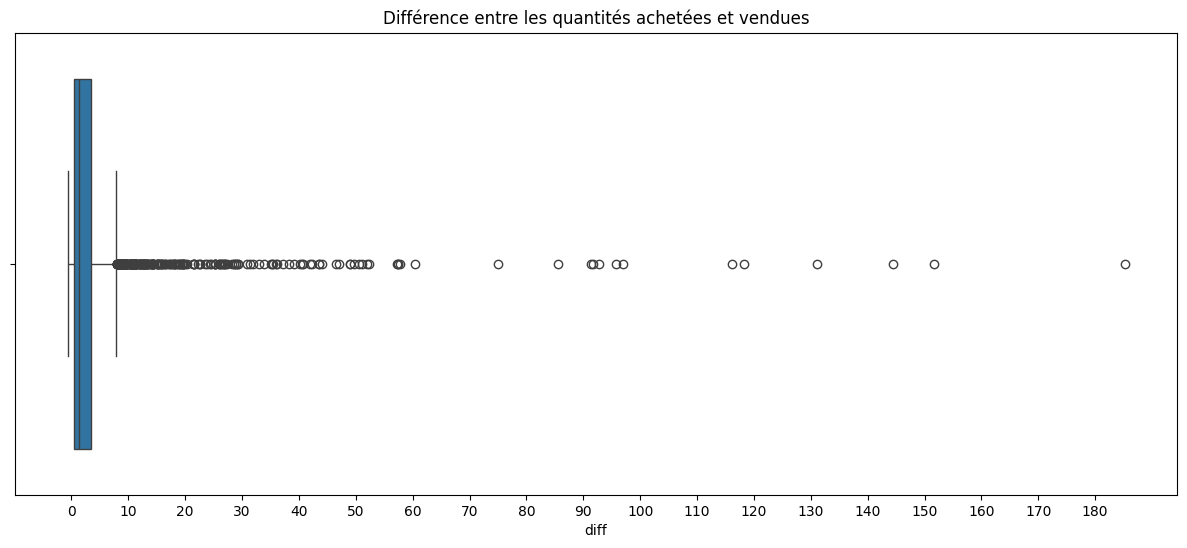

In [385]:
fig = plt.figure(figsize=(15, 6))
sns.boxplot(x='diff', data=selected_items)
plt.title('Différence entre les quantités achetées et vendues')
ticks = np.arange(0, 190, step=10)  # Ajuste 'step' selon tes besoins
plt.xticks(ticks=ticks)
plt.show()

In [386]:
critere = 60
col_number = selected_items[selected_items['diff'] > 60].shape[0]
col_number

14

In [387]:
# Affichager des n top produits les plus perimés (diff > critere)

top_item = selected_items[selected_items['diff'] >= critere].sort_values('diff', ascending=False)

top_item.join(item_map, on='ProdId')

,ProdId,SaledQte,PurchasedQte,diff,ItemName
1132,4178,2.395271,187.553191,185.157920,SERINGUE 10ML DET USAGE UNIQUE
409,1457,7.301923,159.027777,151.725854,DEXAMETHASONE 4MG/1ML AMP INJ DET
725,2585,5.521276,150.000000,144.478724,LAME A BISTOURIE N 10 DET
838,3000,6.040268,137.142857,131.102589,METOCLOPRAMIDE 10MG/2ML DET SOL INJ DESKA
1134,4187,4.722408,122.916666,118.194258,SERINGUE A INSULINE DET 1ML A AIG 29G
1834,6959,8.844444,125.000000,116.155556,LAME A BISTOURIE N 12 DET
1630,6087,3.096774,100.000000,96.903226,LAME A BISTOURIE N 11 DET
476,1642,5.955078,101.741935,95.786857,EAU DISTILLEE AMP DET 5ML DESKA(EPPI)
1147,4225,4.219888,97.029702,92.809814,SMECTA 3G SACH DET IPSEN
908,3248,2.940487,94.705882,91.765395,NAUTAMINE 90MG CP DET SANOFI AVENTIS


In [388]:
top_item.shape[0]

14

In [389]:
# Filtrer les données de sales pour ne garder que les produits dans 'top_item'

sales_perime = sales_nodup[sales_nodup['ProdId'].isin(top_item['ProdId'])]
sales_perime.head()

,OrderDate,ProdId,Quantity
7,2019-08-08,275,1.0
29,2019-08-09,3248,2.0
38,2019-08-10,275,1.0
69,2019-08-10,3248,2.0
91,2019-08-11,275,2.0


In [390]:
sales_perime.shape

(10358, 3)

In [391]:
purchases_perime = purchases_nodup[purchases_nodup['ProdId'].isin(top_item['ProdId'])]
purchases_perime.head(10)

,OrderDate,ProdId,Quantity
526,2019-08-08,3248,100.0
880,2019-08-09,3000,100.0
936,2019-08-10,1457,50.0
1019,2019-08-10,4096,50.0
1023,2019-08-10,4178,100.0
1028,2019-08-10,4187,100.0
1043,2019-08-10,4340,100.0
1266,2019-08-13,275,10.0
1284,2019-08-13,1642,4.0
1456,2019-08-16,275,20.0


In [392]:
sales_perime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 7 to 442548
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OrderDate  10358 non-null  object 
 1   ProdId     10358 non-null  int64  
 2   Quantity   10358 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 323.7+ KB


In [393]:
purchases_perime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687 entries, 526 to 133556
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OrderDate  687 non-null    object 
 1   ProdId     687 non-null    int64  
 2   Quantity   687 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 21.5+ KB


In [394]:
# Transformer la colonne 'OrderDate' en datetime

sales_perime.loc[:, 'OrderDate'] = pd.to_datetime(sales_perime['OrderDate'])
purchases_perime.loc[:, 'OrderDate'] = pd.to_datetime(purchases_perime['OrderDate'])

**Pivoter les data 'sales_perime' et 'purchases_perime' en SERIES TEMPORELLES**

In [395]:
col_order = top_item.ProdId.values

In [396]:
top_item.head(col_number)

,ProdId,SaledQte,PurchasedQte,diff
1132,4178,2.395271,187.553191,185.157920
409,1457,7.301923,159.027777,151.725854
725,2585,5.521276,150.000000,144.478724
838,3000,6.040268,137.142857,131.102589
1134,4187,4.722408,122.916666,118.194258
1834,6959,8.844444,125.000000,116.155556
1630,6087,3.096774,100.000000,96.903226
476,1642,5.955078,101.741935,95.786857
1147,4225,4.219888,97.029702,92.809814
908,3248,2.940487,94.705882,91.765395


In [397]:
sales_perime = sales_perime.pivot_table(index= 'OrderDate',columns='ProdId', values='Quantity', aggfunc='mean')
sales_perime.head()

ProdId,275,1457,1642,2585,3000,3248,4096,4178,4187,4225,4340,6087,6315,6959
OrderDate,,,,,,,,,,,,,,
2019-08-08,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-09,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-10,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-11,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-12,1.0,5.0,NaN,NaN,NaN,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN


In [398]:
sales_perime = sales_perime.reindex(columns=col_order)
sales_perime.head()

ProdId,4178,1457,2585,3000,4187,6959,6087,1642,4225,3248,4096,4340,275,6315
OrderDate,,,,,,,,,,,,,,
2019-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2019-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2019-08-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN
2019-08-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
2019-08-12,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN


In [399]:
purchases_perime = purchases_perime.pivot_table(index= 'OrderDate',columns='ProdId', values='Quantity', aggfunc='mean')
purchases_perime = purchases_perime.reindex(columns=col_order)
purchases_perime.head()

ProdId,4178,1457,2585,3000,4187,6959,6087,1642,4225,3248,4096,4340,275,6315
OrderDate,,,,,,,,,,,,,,
2019-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN
2019-08-09,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-10,100.0,50.0,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,50.0,100.0,NaN,NaN
2019-08-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,10.0,NaN
2019-08-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN


In [400]:
sales_perime = sales_perime.fillna(0)
purchases_perime = purchases_perime.fillna(0)

In [401]:
# récupérer la valeure de la première index date de sales_perime

vdate_min = sales_perime.index.min()
vdate_max = sales_perime.index.max()
adate_min = purchases_perime.index.min()
adate_max = purchases_perime.index.max()
date_min = min(vdate_min, adate_min)
date_max = max(vdate_max, adate_max)
date_min, date_max

(Timestamp('2019-08-08 00:00:00'), Timestamp('2025-08-07 00:00:00'))

In [402]:
# Création d'une plage de dates complète en format aaaa-mm-jj
# entre date_min et date_max
date_range = pd.date_range(start=date_min, end=date_max, freq='D')
date_range

DatetimeIndex(['2019-08-08', '2019-08-09', '2019-08-10', '2019-08-11',
               '2019-08-12', '2019-08-13', '2019-08-14', '2019-08-15',
               '2019-08-16', '2019-08-17',
               ...
               '2025-07-29', '2025-07-30', '2025-07-31', '2025-08-01',
               '2025-08-02', '2025-08-03', '2025-08-04', '2025-08-05',
               '2025-08-06', '2025-08-07'],
              dtype='datetime64[ns]', length=2192, freq='D')

In [403]:
# Réindexer les deux DataFrames avec la plage de dates complète
# et remplir les valeurs manquantes avec 0
sales_perime = sales_perime.reindex(date_range, fill_value=0)
purchases_perime = purchases_perime.reindex(date_range, fill_value=0)

# Afficher les deux DataFrames après réindexation
sales_perime.head(10)

ProdId,4178,1457,2585,3000,4187,6959,6087,1642,4225,3248,4096,4340,275,6315
2019-08-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-08-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2019-08-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
2019-08-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2019-08-12,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
2019-08-13,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
2019-08-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
2019-08-15,5.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
2019-08-16,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,5.0,0.0
2019-08-17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,5.0,0.0


In [404]:
sales_perime.shape, purchases_perime.shape

((2192, 14), (2192, 14))

In [405]:
sales_series = sales_perime.sum(axis=1)
purchases_series = purchases_perime.sum(axis=1)

# Créer un DataFrame fusionné avec les colonnes de sales et d'purchases
fusion_df = pd.DataFrame({'sales': sales_series, 'purchases': purchases_series})
fusion_df.head(10)

,sales,purchases
2019-08-08,1.0,100.0
2019-08-09,2.0,100.0
2019-08-10,3.0,400.0
2019-08-11,2.0,0.0
2019-08-12,14.0,0.0
2019-08-13,6.0,14.0
2019-08-14,4.0,0.0
2019-08-15,14.0,0.0
2019-08-16,31.0,20.0
2019-08-17,12.0,0.0


In [406]:
# Calculer la corrélation entre les colonnes 'sales' et 'purchases'
correlation = fusion_df.corr()
correlation

,sales,purchases
sales,1.000000,0.153124
purchases,0.153124,1.000000


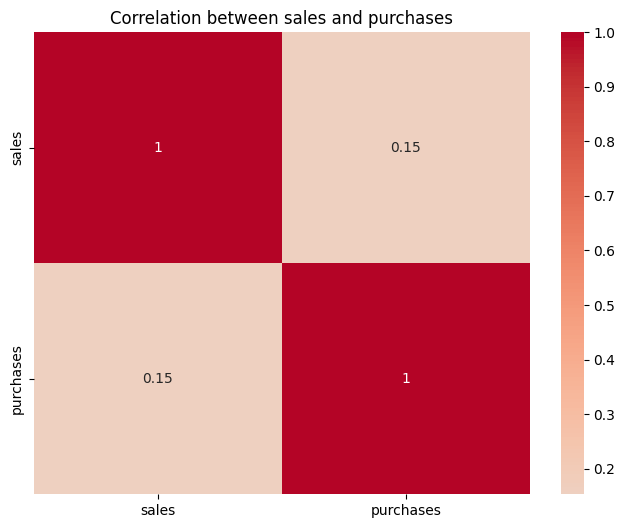

In [407]:
# Visualiser la corrélation avec un heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between sales and purchases')
plt.show()

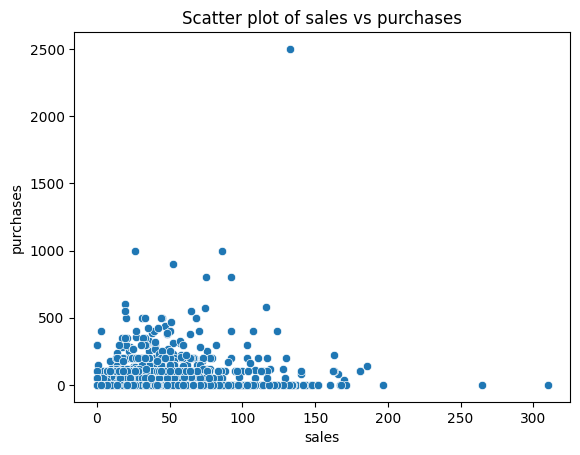

In [408]:
sns.scatterplot(x='sales', y='purchases', data=fusion_df)
plt.title('Scatter plot of sales vs purchases')
plt.xlabel('sales')
plt.ylabel('purchases')
plt.show()

In [409]:
# Combiner les 'sales_perime' et 'purchases_perime' en un seul DataFrame
# et la valeur du nouveau dataframe sera la différence 'sales - purchases'

flow = sales_perime - purchases_perime
flow.head(10)

ProdId,4178,1457,2585,3000,4187,6959,6087,1642,4225,3248,4096,4340,275,6315
2019-08-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,0.0,0.0,1.0,0.0
2019-08-09,0.0,0.0,0.0,-100.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2019-08-10,-100.0,-50.0,0.0,0.0,-100.0,0.0,0.0,0.0,0.0,2.0,-50.0,-100.0,1.0,0.0
2019-08-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2019-08-12,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
2019-08-13,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.0,0.0,2.0,0.0,0.0,-9.0,0.0
2019-08-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
2019-08-15,5.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
2019-08-16,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,-15.0,0.0
2019-08-17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,5.0,0.0


In [410]:
flow.isnull().sum()

ProdId
4178    0
1457    0
2585    0
3000    0
4187    0
6959    0
6087    0
1642    0
4225    0
3248    0
4096    0
4340    0
275     0
6315    0
dtype: int64

In [411]:
flow.columns

Index([4178, 1457, 2585, 3000, 4187, 6959, 6087, 1642, 4225, 3248, 4096, 4340,
        275, 6315],
      dtype='int64', name='ProdId')

In [412]:
flow_week = flow.resample('W').mean()

In [413]:
flow_week.head()

ProdId,4178,1457,2585,3000,4187,6959,6087,1642,4225,3248,4096,4340,275,6315
2019-08-11,-25.000000,-12.500000,0.0,-25.000000,-25.000000,0.0,0.0,0.000000,0.000000,-24.000000,-12.5,-25.000000,1.000000,0.0
2019-08-18,3.285714,0.714286,0.0,0.000000,0.571429,0.0,0.0,-0.571429,0.000000,5.000000,0.0,0.285714,-2.571429,0.0
2019-08-25,0.428571,0.000000,0.0,0.000000,2.857143,0.0,0.0,0.571429,-7.571429,-11.000000,0.0,0.714286,-0.142857,0.0
2019-09-01,1.428571,0.000000,0.0,0.571429,2.428571,0.0,0.0,0.000000,0.857143,1.000000,0.0,0.285714,2.285714,0.0
2019-09-08,2.857143,0.428571,0.0,0.000000,0.000000,0.0,0.0,0.000000,2.285714,2.142857,0.0,2.142857,-1.857143,0.0


In [418]:
flow_week.describe()

ProdId,4178,1457,2585,3000,4187,6959,6087,1642,4225,3248,4096,4340,275,6315
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,-0.172543,-0.043904,-0.036852,-0.088717,-0.148772,-0.046406,-0.001820,-0.046065,0.020814,-0.089172,-0.103503,-0.058235,-0.016265,-0.018198
std,12.902041,21.268279,1.682113,5.699799,7.224763,2.296541,0.840705,4.876822,10.248183,7.927936,8.861314,5.274606,11.202326,1.701169
min,-62.285714,-294.000000,-14.285714,-71.142857,-41.571429,-28.571429,-14.000000,-51.285714,-118.285714,-48.714286,-57.142857,-25.857143,-138.000000,-21.428571
25%,-9.107143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.142857,0.000000
50%,4.285714,1.785714,0.000000,0.142857,1.714286,0.000000,0.000000,0.428571,2.071429,1.000000,0.000000,0.714286,2.285714,0.000000
75%,8.428571,4.107143,0.000000,0.714286,3.250000,0.000000,0.000000,1.428571,5.000000,3.142857,3.571429,2.571429,3.571429,0.000000
max,35.285714,66.000000,4.428571,38.857143,14.285714,13.714286,3.714286,14.428571,17.000000,30.857143,27.000000,7.714286,7.285714,7.142857


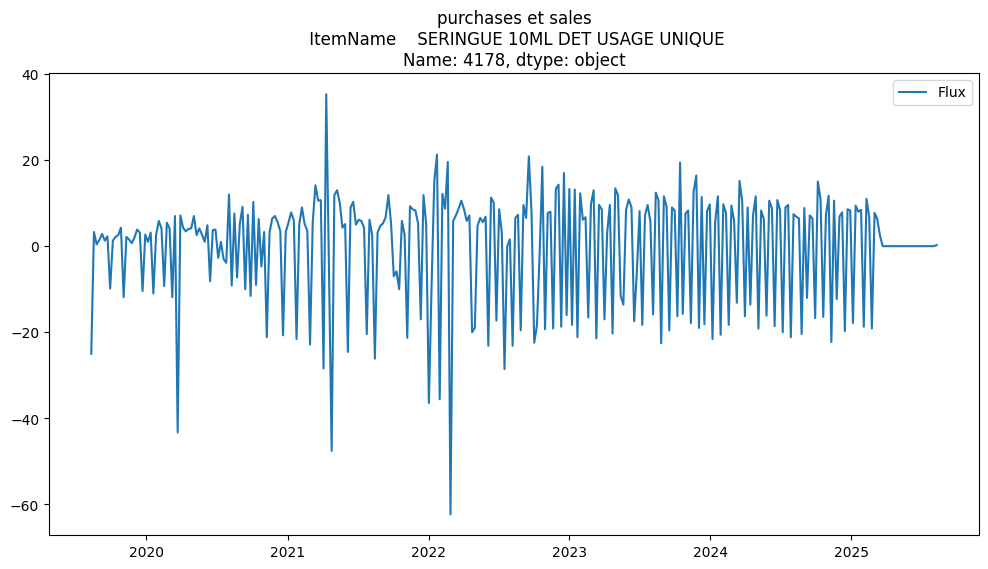

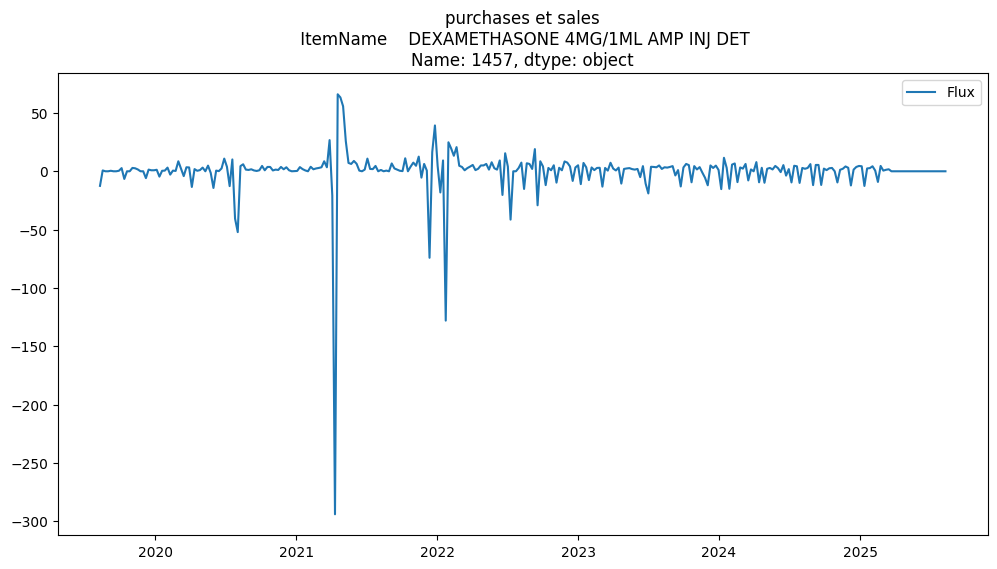

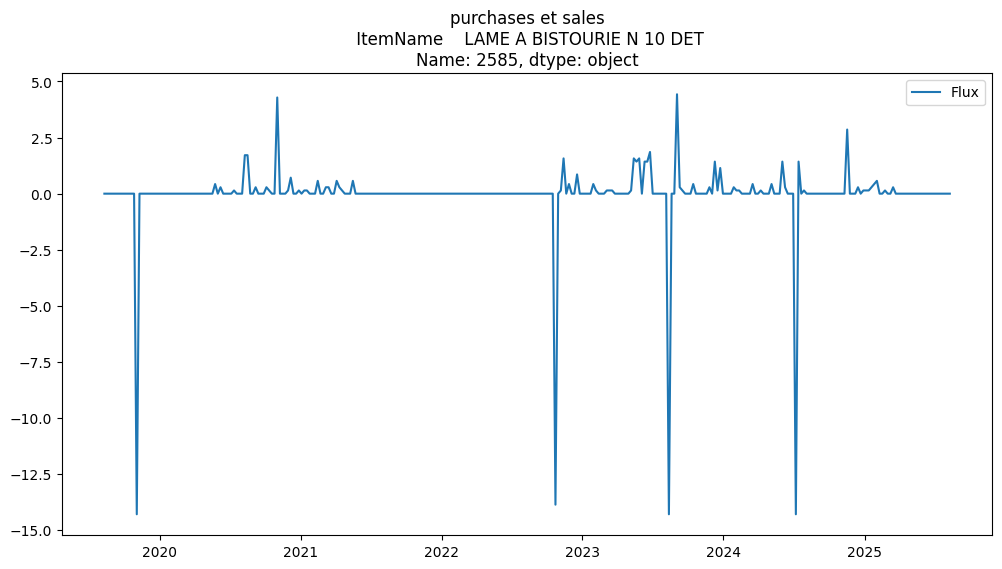

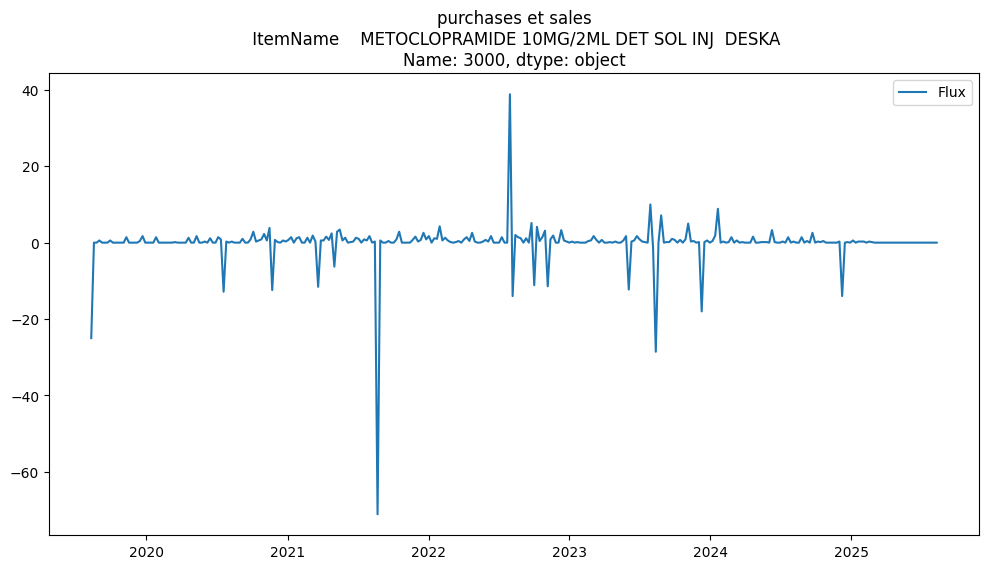

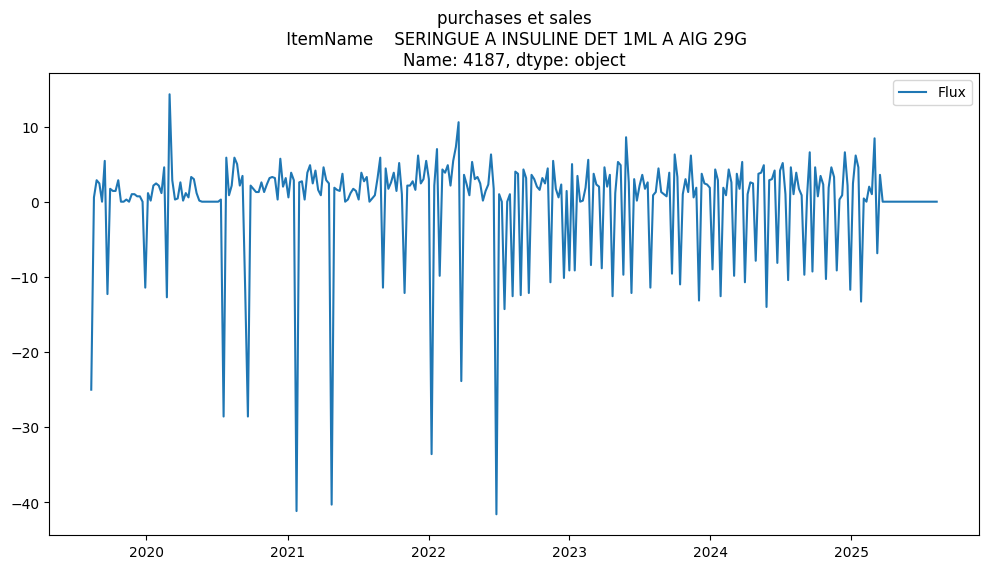

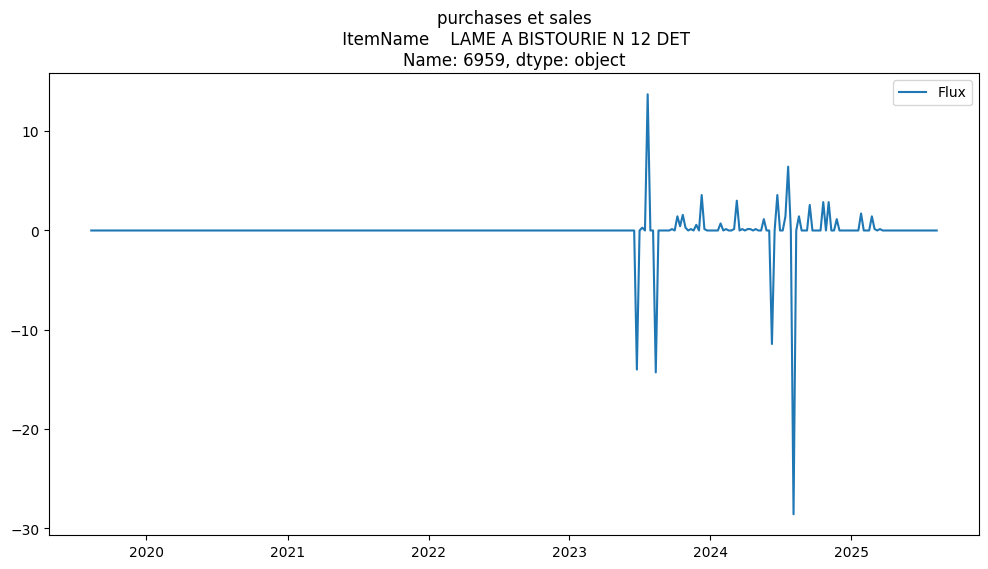

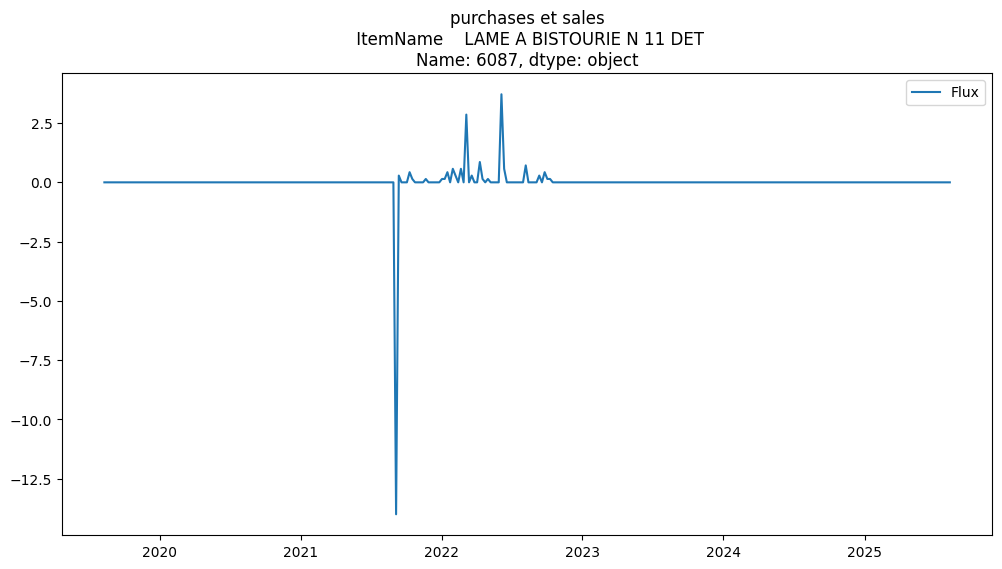

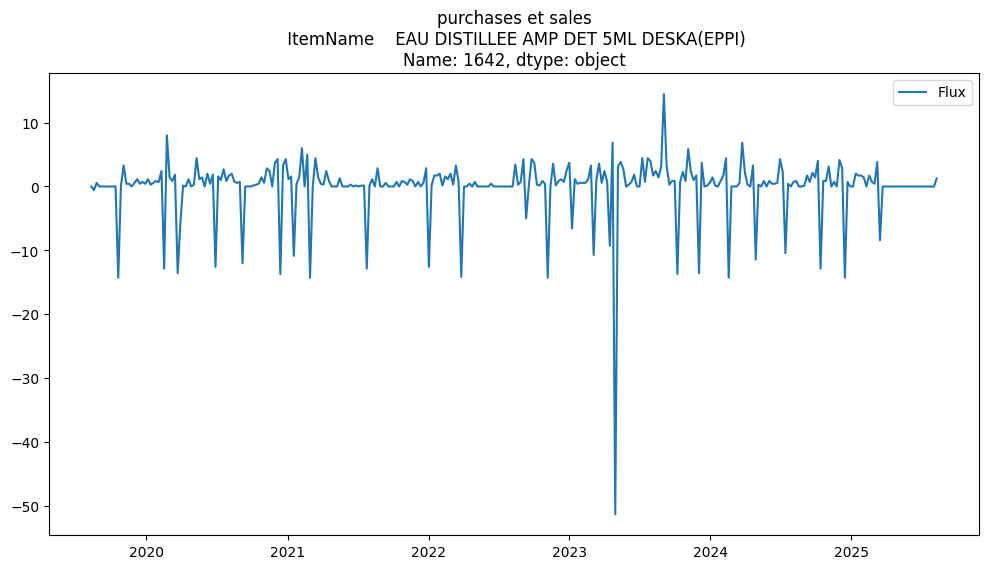

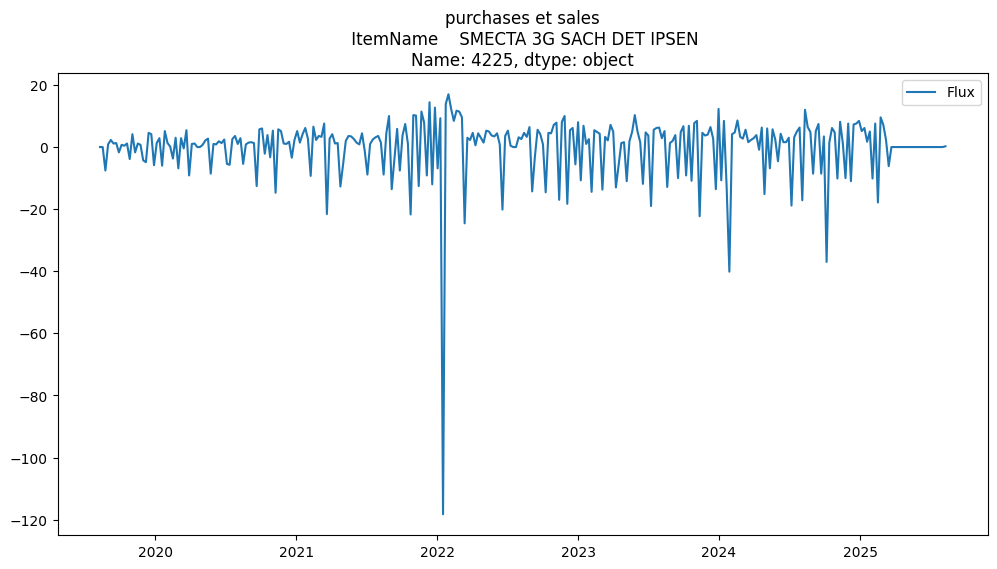

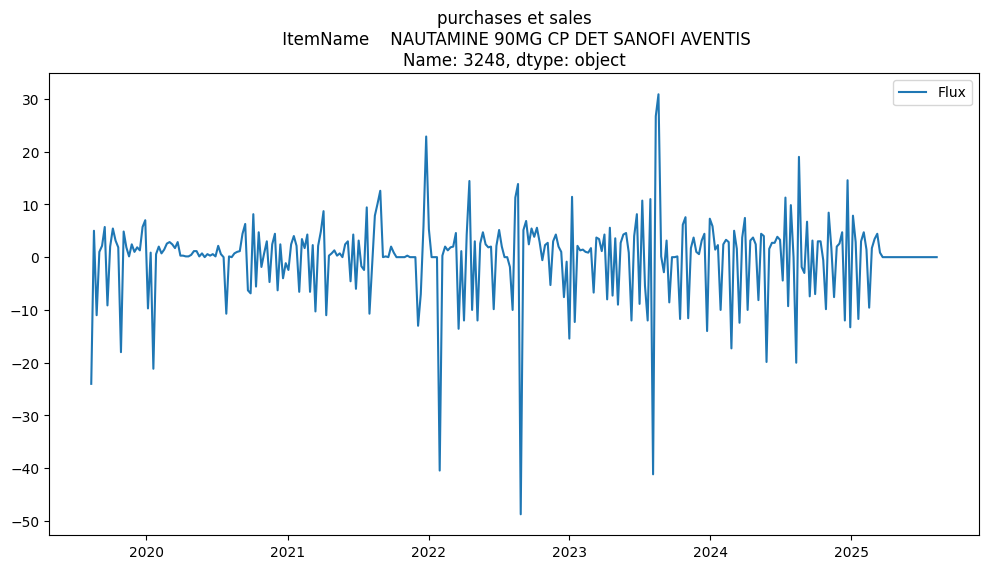

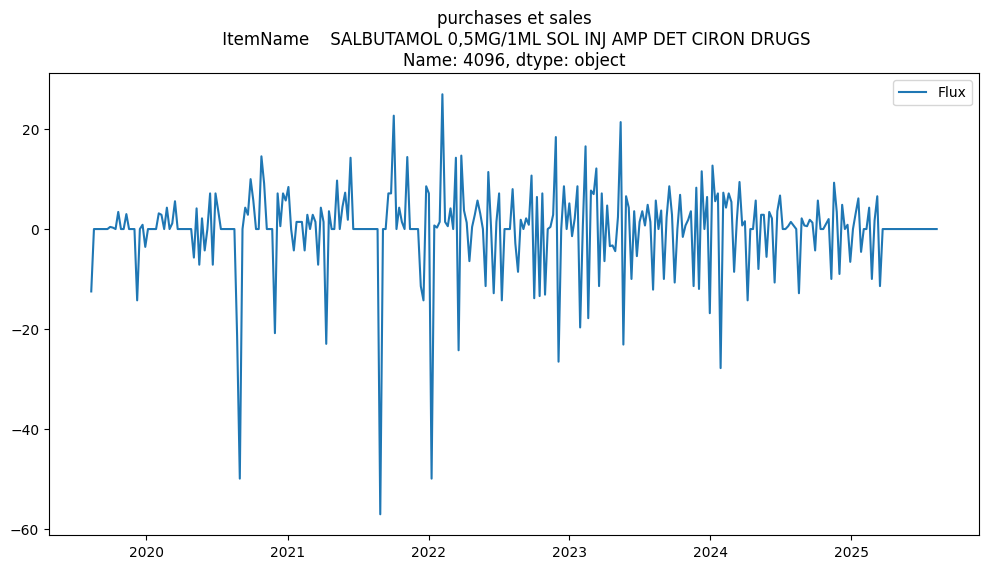

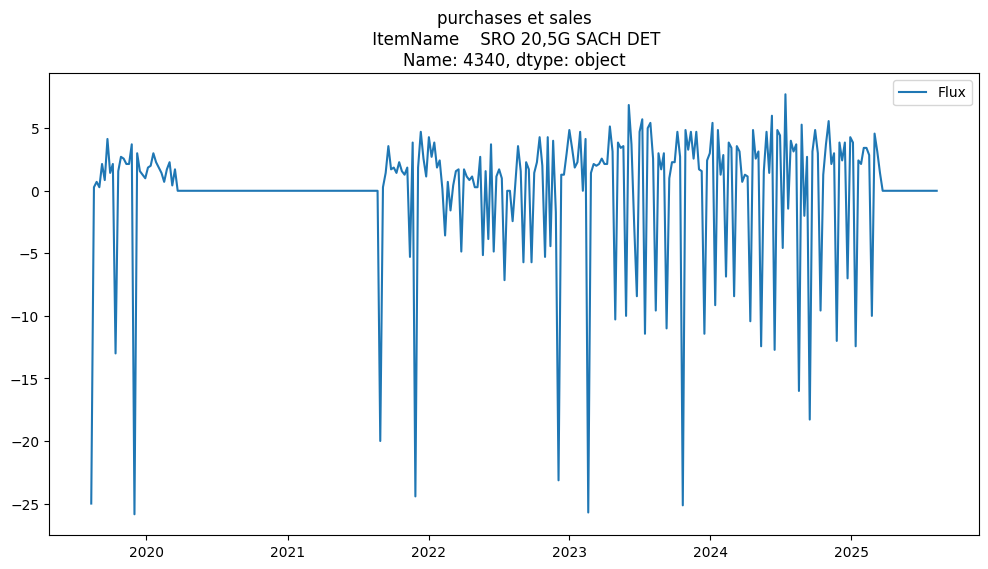

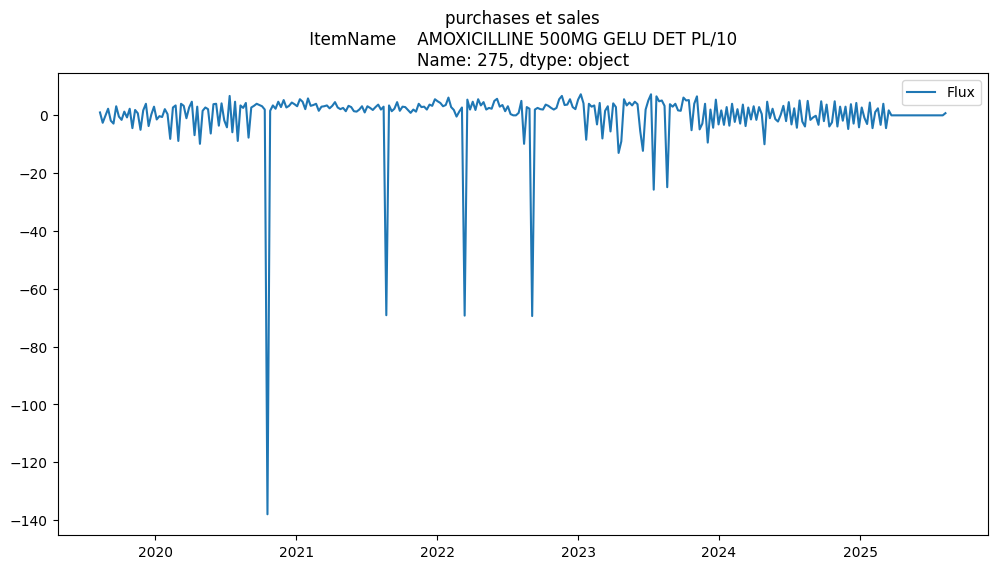

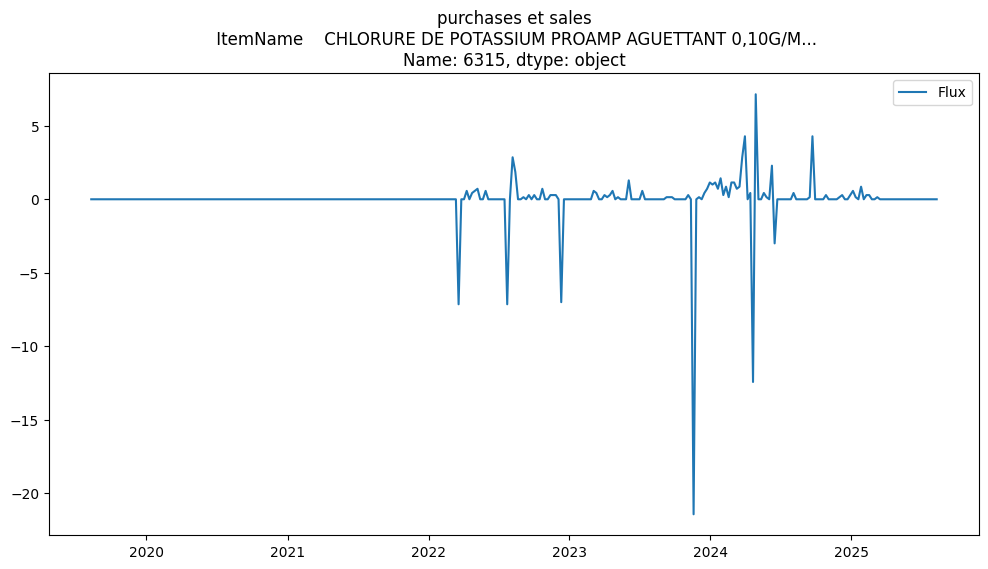

In [417]:
for col in flow_week.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(flow_week[col], label='Flux')
    plt.title(f'purchases et sales\n {item_map.loc[col]}')
    plt.legend()
    plt.show()